<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%204/Feature_Engineering_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Engineering dan Pembagian Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Memuat dataset training
df = pd.read_csv("/content/train.csv")

# Menghapus fitur yang tidak relevan
df.drop(columns=["Id"], inplace=True)

# Encoding fitur kategorikal
categorical_features = df.select_dtypes(include=["object"]).columns

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Normalisasi fitur numerik
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
numerical_features = numerical_features.drop("SalePrice")  # Target tidak dinormalisasi

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Membagi dataset menjadi training dan testing
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset setelah split
print("Ukuran Training Set:", X_train.shape)
print("Ukuran Test Set:", X_test.shape)


Ukuran Training Set: (1168, 79)
Ukuran Test Set: (292, 79)


In [6]:
# Mengisi missing values: Median untuk numerik, Mode untuk kategorikal
for col in X_train.columns:
    if X_train[col].dtype == "object":  # Jika kategorikal
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)
        X_test[col].fillna(X_train[col].mode()[0], inplace=True)
    else:  # Jika numerik
        X_train[col].fillna(X_train[col].median(), inplace=True)
        X_test[col].fillna(X_train[col].median(), inplace=True)

# Periksa apakah masih ada NaN setelah imputasi
print("Missing values setelah imputasi:", X_train.isnull().sum().sum(), X_test.isnull().sum().sum())

# Jika outputnya 0, lanjutkan ke langkah berikutnya:
model = LinearRegression()
model.fit(X_train, y_train)


<ipython-input-6-4757290fe477>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].median(), inplace=True)
<ipython-input-6-4757290fe477>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Missing values setelah imputasi: 0 0


LinearRegression()

## **Evaluasi Model dan Deteksi Overfitting**

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Memuat dataset test
df_test = pd.read_csv("/content/test.csv")

# Pastikan test dataset memiliki fitur yang sama dengan training set
df_test.drop(columns=["Id"], inplace=True)

# Encoding fitur kategorikal
categorical_features = df_test.select_dtypes(include=["object"]).columns
for col in categorical_features:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])

# Normalisasi fitur numerik
numerical_features = df_test.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_test[numerical_features] = scaler.fit_transform(df_test[numerical_features])

# Latih model menggunakan training set
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada training dan test dataset
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)  # Menggunakan X_test, bukan df_test karena df_test tidak memiliki label

# Evaluasi performa model pada training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Set - MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}")

# Evaluasi performa model pada test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set - MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}")

# Menentukan apakah terjadi overfitting
if r2_train > r2_test:
    print("Model mengalami overfitting.")
else:
    print("Model tidak mengalami overfitting.")


Training Set - MSE: 865095022.4910108, RMSE: 29412.497726153942, R²: 0.8549605640979937
Test Set - MSE: 1194633476.5447145, RMSE: 34563.47026189232, R²: 0.8442525853169923
Model mengalami overfitting.


## **Penjelasan Matematika**

> Setelah dilakukan training model dan testing overfitting, R^2 training lebih besar dari pada R^2 di testing, sehingga model mengalami overfitting.

**Mean Squared Error (MSE)**

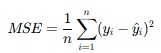

Penjelasan

* n -> Jumlah sampel dalam dataset
* yi -> Nilai aktual dari data (ground truth)
* ^yi -> Nilai prediksi dari model
* (yi− ^yi)2 -> Selisih antara nilai aktual dan prediksi, kemudian dikuadratkan untuk menghindari nilai negatif.
* 1/n ∑ -> Menghitung rata-rata dari semua error yang telah dikuadratkan

MSE digunakan untuk mengukur seberapa jauh prediksi model dari nilai sebenarnya. semakin kecil MSE, semakin baik model.

**Root Mean Squared Error (RMSE)**

222.jpg

Penjelasan

* RMSE adalah dari dari MSE sehingga memiliki satuan yang sama dengan data asli.
* RMSE lebih sensitif terhadapa error besar dibandingkan MSE

RMSE lebih mudah diinterpretasikan karena berada dalam skala yang sama dengan variabel target.

**R-Square (R^2)**

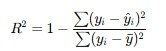

penjelasan

* yi -> Nilai aktual
* ^yi -> Nilai prediksi dari model
* 𝑦ˉ -> Nilai rata-rata dari semua yi
* ∑(yi−^yi)^2 -> Jumalh kuadrat dari error (SSE -Sum of squared errors)
* ∑(𝑦𝑖−𝑦ˉ)^2 -> Variasi total dalam data (SST - Sum of Squared Total)
* R^2 -> Proporsi variasi dalam data yang bisa dijelaskan oleh model
